In [26]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.abspath('..'))
from backtracking import resolver
from greedy_pakku import greedy_pakku
import random
import time
from matplotlib import pyplot as plt
from tqdm import trange
import numpy as np
import pandas as pd
from math import log

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
random.seed(67910)

### Parámetros


In [28]:
REPS = 3
MIN_TAM = 12
MAX_TAM = 19
CANT_GRUPOS = 3

In [29]:
def generar_habilidades(n):
    habilidades = []
    for _ in range(n):
        habilidades.append(random.randint(10, 1000))
    return habilidades

— ejec 24/24 (100.0%)


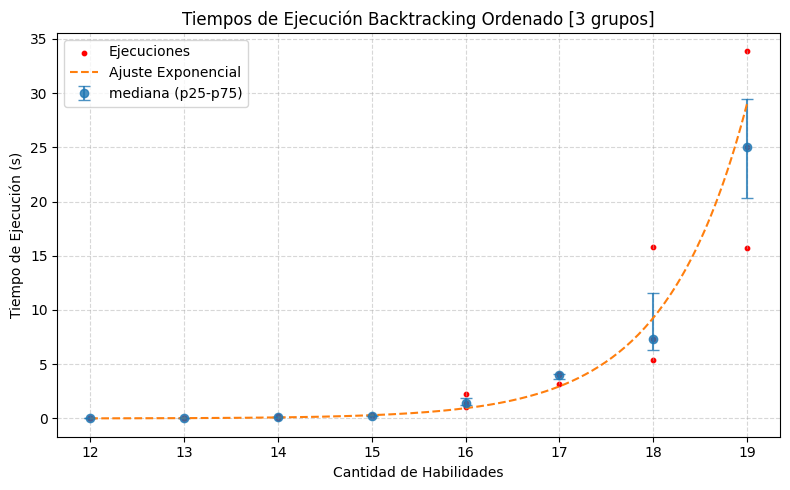

In [30]:

filas = []

total_iters = REPS * (MAX_TAM - MIN_TAM + 1)
iter_idx = 0

for i in range(REPS):
    for tam in range(MIN_TAM, MAX_TAM + 1):
        iter_idx += 1
        habilidades = generar_habilidades(tam)

        inicio = time.perf_counter()
        resolver(CANT_GRUPOS, habilidades, True)
        dur = time.perf_counter() - inicio

        filas.append({"tam": tam, "iter": i, "tiempo": dur})

        # Indicador avance
        pct = iter_idx / total_iters * 100
        sys.stdout.write(f"\r— ejec {iter_idx}/{total_iters} ({pct:5.1f}%)")
        sys.stdout.flush()

print()

# Estadísticas por tamaño
df = pd.DataFrame(filas)
summary = df.groupby("tam")["tiempo"].agg(["median", "mean", "count",
                                           lambda x: np.percentile(x, 25),
                                           lambda x: np.percentile(x, 75)])
summary.columns = ["median", "mean", "count", "p25", "p75"]
# print(summary)

# Ajuste median
x = summary.index.values.astype(float)         # tamaños
y_med = summary["median"].values

# Ajuste exponencial
mask = y_med > 0
coeffs_log = np.polyfit(x[mask], np.log(y_med[mask]), 1)
b_exp, a_log = coeffs_log[0], coeffs_log[1]


def modelo_exponencial(xv):
    return np.exp(a_log + b_exp * xv)


plt.figure(figsize=(8, 5))
plt.scatter(df["tam"], df["tiempo"], color='red',
            s=10, alpha=1, label="Ejecuciones")


plt.errorbar(x, y_med, yerr=[y_med - summary["p25"].values, summary["p75"].values - y_med],
             fmt='o', alpha=.8, capsize=4, label="mediana (p25-p75)")

xs = np.linspace(MIN_TAM, MAX_TAM, 200)
plt.plot(xs, modelo_exponencial(xs), linestyle='--',
         label=f"Ajuste Exponencial")

plt.xlabel('Cantidad de Habilidades')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempos de Ejecución Backtracking Ordenado [3 grupos]')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("../informe/img/ajuste_backtracking_ordenado.png",
            dpi=300, bbox_inches='tight')
plt.show()

— ejec 24/24 (100.0%)


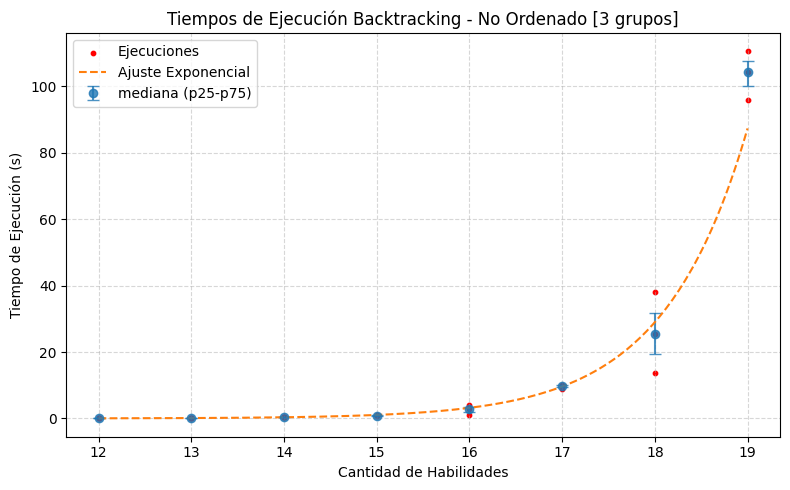

In [31]:
filas = []

total_iters = REPS * (MAX_TAM - MIN_TAM + 1)
iter_idx = 0

for i in range(REPS):
    for tam in range(MIN_TAM, MAX_TAM + 1):
        iter_idx += 1
        habilidades = generar_habilidades(tam)

        inicio = time.perf_counter()
        resolver(CANT_GRUPOS, habilidades, False)
        dur = time.perf_counter() - inicio

        filas.append({"tam": tam, "iter": i, "tiempo": dur})

        # Indicador avance
        pct = iter_idx / total_iters * 100
        sys.stdout.write(f"\r— ejec {iter_idx}/{total_iters} ({pct:5.1f}%)")
        sys.stdout.flush()

print()

# Estadísticas por tamaño
df = pd.DataFrame(filas)
summary = df.groupby("tam")["tiempo"].agg(["median", "mean", "count",
                                           lambda x: np.percentile(x, 25),
                                           lambda x: np.percentile(x, 75)])
summary.columns = ["median", "mean", "count", "p25", "p75"]
# print(summary)

# Ajuste median
x = summary.index.values.astype(float)         # tamaños
y_med = summary["median"].values

# Ajuste exponencial
mask = y_med > 0
coeffs_log = np.polyfit(x[mask], np.log(y_med[mask]), 1)
b_exp, a_log = coeffs_log[0], coeffs_log[1]


def modelo_exponencial(xv):
    return np.exp(a_log + b_exp * xv)


plt.figure(figsize=(8, 5))
plt.scatter(df["tam"], df["tiempo"], color='red',
            s=10, alpha=1, label="Ejecuciones")


plt.errorbar(x, y_med, yerr=[y_med - summary["p25"].values, summary["p75"].values - y_med],
             fmt='o', alpha=.8, capsize=4, label="mediana (p25-p75)")

xs = np.linspace(MIN_TAM, MAX_TAM, 200)
plt.plot(xs, modelo_exponencial(xs), linestyle='--',
         label=f"Ajuste Exponencial")

plt.xlabel('Cantidad de Habilidades')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempos de Ejecución Backtracking - No Ordenado [3 grupos]')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("../informe/img/ajuste_backtracking_sin_ordenar.png",
            dpi=300, bbox_inches='tight')
plt.show()


— ejec 24/24 (100.0%)


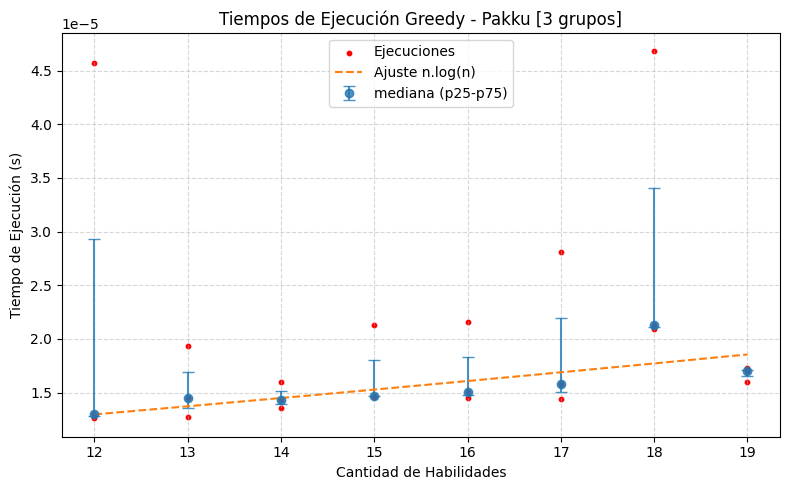

In [32]:
filas = []

total_iters = REPS * (MAX_TAM - MIN_TAM + 1)
iter_idx = 0

for i in range(REPS):
    for tam in range(MIN_TAM, MAX_TAM + 1):
        iter_idx += 1
        habilidades = generar_habilidades(tam)

        inicio = time.perf_counter()
        greedy_pakku(CANT_GRUPOS, habilidades)
        dur = time.perf_counter() - inicio

        filas.append({"tam": tam, "iter": i, "tiempo": dur})

        # Indicador avance
        pct = iter_idx / total_iters * 100
        sys.stdout.write(f"\r— ejec {iter_idx}/{total_iters} ({pct:5.1f}%)")
        sys.stdout.flush()

print()

# Estadísticas por tamaño
df = pd.DataFrame(filas)
summary = df.groupby("tam")["tiempo"].agg(["median", "mean", "count",
                                           lambda x: np.percentile(x, 25),
                                           lambda x: np.percentile(x, 75)])
summary.columns = ["median", "mean", "count", "p25", "p75"]
# print(summary)

# Ajuste median con modelo n*log(n)
x = summary.index.values.astype(float)         # tamaños
y_med = summary["median"].values

# Evitar log(0)
x_safe = np.where(x > 0, x, 1)
x_logn = x_safe * np.log(x_safe)

# Ajuste lineal: y ≈ a * (n log n) + b
coeffs_nlogn = np.polyfit(x_logn, y_med, 1)
a_nlogn, b_nlogn = coeffs_nlogn[0], coeffs_nlogn[1]

def modelo_nlogn(xv):
    xv_safe = np.where(xv > 0, xv, 1)
    return a_nlogn * xv_safe * np.log(xv_safe) + b_nlogn


plt.figure(figsize=(8, 5))
plt.scatter(df["tam"], df["tiempo"], color='red',
            s=10, alpha=1, label="Ejecuciones")


plt.errorbar(x, y_med, yerr=[y_med - summary["p25"].values, summary["p75"].values - y_med],
             fmt='o', alpha=.8, capsize=4, label="mediana (p25-p75)")

xs = np.linspace(MIN_TAM, MAX_TAM, 200)
plt.plot(xs, modelo_nlogn(xs), linestyle='--',
         label=f"Ajuste n.log(n)")

plt.xlabel('Cantidad de Habilidades')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempos de Ejecución Greedy - Pakku [3 grupos]')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("../informe/img/ajuste_greedy_pakku.png",
            dpi=300, bbox_inches='tight')
plt.show()


In [33]:
REPS = 3
MIN_TAM = 200
MAX_TAM = 1000
SALTO = 50
CANT_GRUPOS = 50

— ejec 51/2403 (  2.1%)


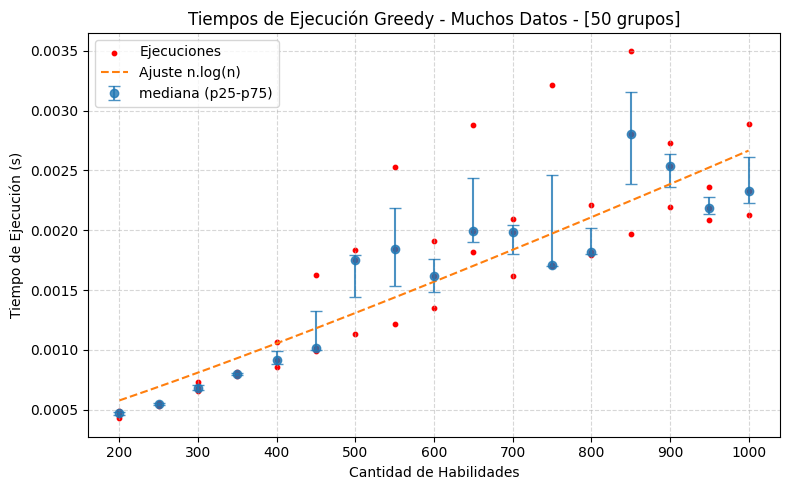

In [34]:

filas = []

total_iters = REPS * (MAX_TAM - MIN_TAM + 1)
iter_idx = 0

for i in range(REPS):
    for tam in range(MIN_TAM, MAX_TAM + 1, SALTO):
        iter_idx += 1
        habilidades = generar_habilidades(tam)

        inicio = time.perf_counter()
        greedy_pakku(CANT_GRUPOS, habilidades)
        dur = time.perf_counter() - inicio

        filas.append({"tam": tam, "iter": i, "tiempo": dur})

        # Indicador avance
        pct = iter_idx / total_iters * 100
        sys.stdout.write(f"\r— ejec {iter_idx}/{total_iters} ({pct:5.1f}%)")
        sys.stdout.flush()

print()

# Estadísticas por tamaño
df = pd.DataFrame(filas)
summary = df.groupby("tam")["tiempo"].agg(["median", "mean", "count",
                                           lambda x: np.percentile(x, 25),
                                           lambda x: np.percentile(x, 75)])
summary.columns = ["median", "mean", "count", "p25", "p75"]
# print(summary)

# Ajuste median con modelo n*log(n)
x = summary.index.values.astype(float)         # tamaños
y_med = summary["median"].values

# Evitar log(0)
x_safe = np.where(x > 0, x, 1)
x_logn = x_safe * np.log(x_safe)

# Ajuste lineal: y ≈ a * (n log n) + b
coeffs_nlogn = np.polyfit(x_logn, y_med, 1)
a_nlogn, b_nlogn = coeffs_nlogn[0], coeffs_nlogn[1]

def modelo_nlogn(xv):
    xv_safe = np.where(xv > 0, xv, 1)
    return a_nlogn * xv_safe * np.log(xv_safe) + b_nlogn


plt.figure(figsize=(8, 5))
plt.scatter(df["tam"], df["tiempo"], color='red',
            s=10, alpha=1, label="Ejecuciones")


plt.errorbar(x, y_med, yerr=[y_med - summary["p25"].values, summary["p75"].values - y_med],
             fmt='o', alpha=.8, capsize=4, label="mediana (p25-p75)")

xs = np.linspace(MIN_TAM, MAX_TAM, 200)
plt.plot(xs, modelo_nlogn(xs), linestyle='--',
         label=f"Ajuste n.log(n)")

plt.xlabel('Cantidad de Habilidades')
plt.ylabel('Tiempo de Ejecución (s)')
plt.title('Tiempos de Ejecución Greedy - Muchos Datos - [50 grupos]')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("../informe/img/ajuste_greedy_pakku_muchos.png",
            dpi=300, bbox_inches='tight')
plt.show()